# `Retail Giant Sales Forecasting Assignment`

### Importing the necessary libraries:

In [1]:
# Libraries for data reading and mathematical operations:

import numpy as np
import pandas as pd

# Libraries required for plotting of graphs and visualisations:

import matplotlib.pyplot as plt 
import seaborn as sns

# Library to suppress warnings:

import warnings
warnings.filterwarnings("ignore")
 
# library to convert date-time.

import datetime

### Reading the dataset

In [2]:
# Reading the CSV file and storing it in a variable defined as "df".

df = pd.read_csv('Global+Superstore+Data.csv')

# Getting a basic idea of the data we have.

df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


**The dataset has five attributes : `Order date, Segment, market, sales and profit`.**

In [3]:
# Creating a new column named using ' Market , Segment'

df['Market-Seg'] = df['Segment']+' - '+df['Market']

# Converting date time.

df['Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')
df.head()

,Order Date,Segment,Market,Sales,Profit,Market-Seg,Date
0,31-07-2012,Consumer,US,2309.650,762.1845,Consumer - US,2012-07
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,Corporate - APAC,2013-05
2,17-10-2013,Consumer,APAC,5175.171,919.9710,Consumer - APAC,2013-10
3,28-01-2013,Home Office,EU,2892.510,-96.5400,Home Office - EU,2013-01
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Consumer - Africa,2013-05


In [4]:
# Couting the total number of values we have.

pd.DataFrame(df['Market-Seg'].value_counts(normalize = True)*100)

,Market-Seg
Consumer - APAC,11.111328
Consumer - LATAM,10.374342
Consumer - US,10.120881
Consumer - EU,10.111133
Corporate - APAC,6.400858
Corporate - EU,5.999220
Corporate - LATAM,5.952427
Corporate - US,5.888087
Consumer - EMEA,4.948333
Consumer - Africa,4.642230


#### Inspecting the dataframe 

In [5]:
# Checking the shape of the dataset.

df.shape

(51290, 7)

**There are `51290 entries and 7 columns`now.**

In [6]:
# Checking if our dataset has any missing values.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype    
---  ------      --------------  -----    
 0   Order Date  51290 non-null  object   
 1   Segment     51290 non-null  object   
 2   Market      51290 non-null  object   
 3   Sales       51290 non-null  float64  
 4   Profit      51290 non-null  float64  
 5   Market-Seg  51290 non-null  object   
 6   Date        51290 non-null  period[M]
dtypes: float64(2), object(4), period[M](1)
memory usage: 2.7+ MB


**There are `no null values` in any columns. Which means that there is no need of handling of any missing values.**

In [7]:
# Describing our dataset.

df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


- **Mean value for sales is `246.49` and mean value for profit is `28.61`.**
- **Maximum sales is `22638.48` and maximum profit is `8399.97`.**
- **Minimum in sales is `0.44` and minimum profit is `-6599.97`.**


In [8]:
# Sorting the dataset based on date and time.

df.sort_values(by='Date', inplace = True)
print('Order date starts from', df['Date'].min(),'and ends at',df['Date'].max())

Order date starts from 2011-01 and ends at 2014-12


**Now we know that we have data ranging from dates `January of 2011 to December of 2014`.**

### Univariate analysis

Text(0.5, 1.0, 'Boxplot for Sales')

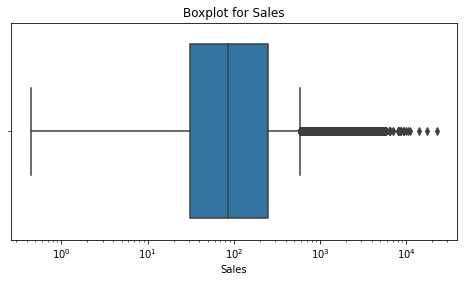

In [9]:
# Constructing a boxplot for sales to see if we have any outliers.

plt.figure(figsize = (8,4))
sns.boxplot(x = 'Sales', data = df)
plt.xscale('log')
plt.title('Boxplot for Sales')

**There seem to be a `lot of points above the 75th percentile of Sales`.**

Text(0.5, 1.0, 'Boxplot of Profit ')

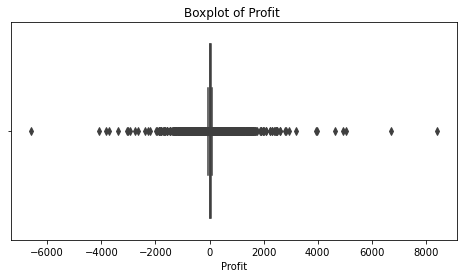

In [10]:
# Constructing a boxplot for Profit to check outliers.

plt.figure(figsize = (8,4))
plot = sns.boxplot(x = 'Profit', data = df)
plt.title('Boxplot of Profit ')

**The profit values have a `wide spread ranging from about -6500 to 8500.`**

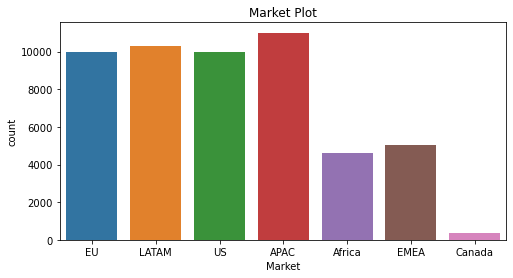

In [11]:
# For Market it's better to construct a countplot as it is categorised into 7 markets for which boxplot is not possible.

plt.figure(figsize = (8,4))
plt.title('Market Plot')
sns.countplot(x = 'Market', data = df)

**`Asia pacific ( APAC )` seems to have the highest count in entries.**

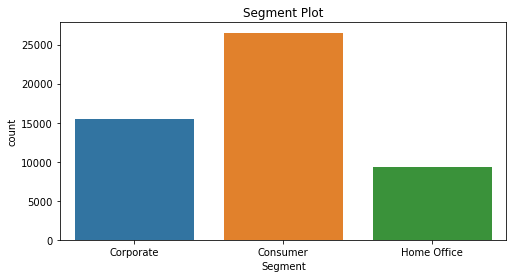

In [12]:
# Coutplot for Segments.

plt.figure(figsize = (8,4))
plt.title('Segment Plot')
sns.countplot(x = 'Segment', data = df)

**`Consumer seems to have the highest number` of entries.** 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 <a list of 21 Text major ticklabel objects>)

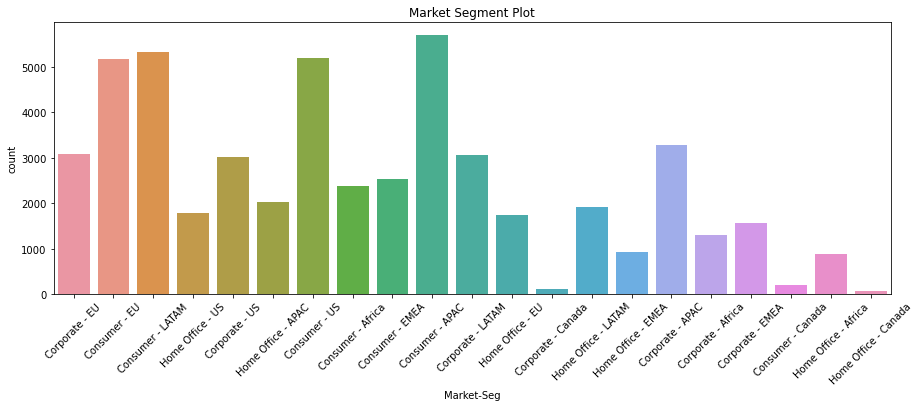

In [13]:
# Countplot for Market - Segment .

plt.figure(figsize = (15,5))
plt.title('Market Segment Plot')
sns.countplot(x = 'Market-Seg', data = df)
plt.xticks(rotation = 45)

**`Consumer-APAC` has the highest number of entries.**

### Bivariate Analysis 

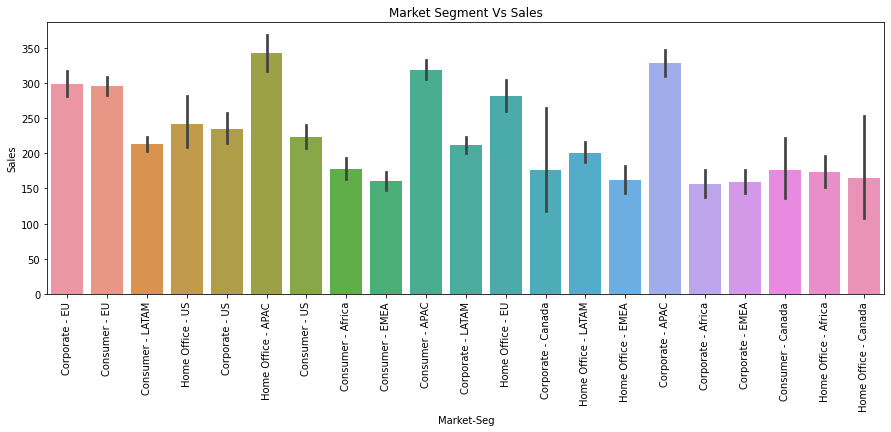

In [14]:
# Barplot for Market-Segment with Sales.

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
plt.title('Market Segment Vs Sales')
sns.barplot(data = df, x = 'Market-Seg', y = 'Sales')

**`Home Office-APAC` has the highest sales followed by corporate-APAC .**

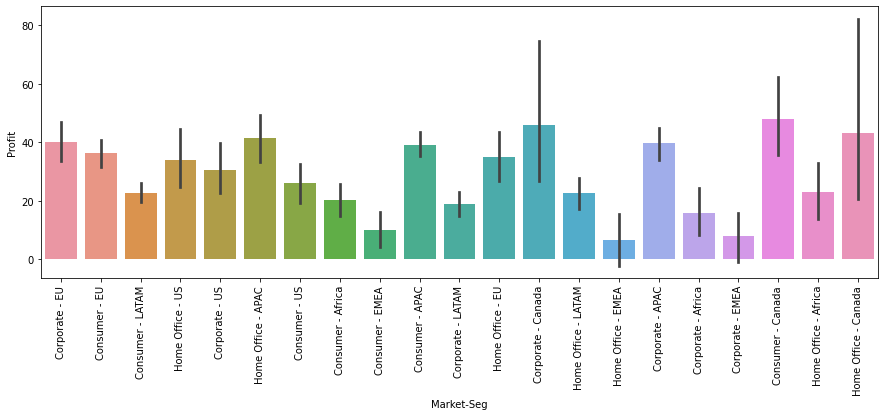

In [15]:
# Barplot for Market-Segment with Profit.

plt.figure(figsize = (15,5))
plt.xticks(rotation = 90)
sns.barplot(data = df, x = 'Market-Seg', y = 'Profit')

**`Consumer- Canada` has the highest profits followed by Corporate Canada.**

### Data Preparation 

In [16]:
# Aggregating the Profit Values for each Market Segment.

df_aggregate = df.pivot_table(index='Date', values='Profit', columns='Market-Seg', aggfunc='sum')

In [17]:
# Splitting into train and test datasets .

train_len = 42
train = df_aggregate[0:train_len]
test = df_aggregate[train_len:]

**Train length is kept as `42 months and test set length is 6 months` as given in the question.**

In [82]:
# Calculating COV 

mean = np.mean(train)
std = np.std(train)
CoV = std/mean
CoV = pd.DataFrame(CoV)
CoV = CoV.reset_index()
CoV.columns = ['Market segment','Most Consistent']
CoV.sort_values(by = 'Most Consistent', ascending = True, inplace = True)
CoV

,Market segment,Most Consistent
0,Consumer - APAC,0.522725
7,Corporate - APAC,0.530051
4,Consumer - EU,0.595215
5,Consumer - LATAM,0.683770
11,Corporate - EU,0.722076
12,Corporate - LATAM,0.882177
18,Home Office - EU,0.938072
14,Home Office - APAC,1.008219
6,Consumer - US,1.010530
13,Corporate - US,1.071829


**The most consistent market is `Consumer-APAC`.**

In [19]:
# Filtering the data for the Most consistent market segment. 

df_new = df[df['Market-Seg'] == 'Consumer - APAC']
df_new = df_new.drop('Order Date', axis = 1)
df_new.head()

,Segment,Market,Sales,Profit,Market-Seg,Date
1080,Consumer,APAC,1429.050,371.490,Consumer - APAC,2011-01
9203,Consumer,APAC,219.780,59.340,Consumer - APAC,2011-01
19331,Consumer,APAC,342.510,54.600,Consumer - APAC,2011-01
26270,Consumer,APAC,102.762,1.842,Consumer - APAC,2011-01
14830,Consumer,APAC,420.420,147.000,Consumer - APAC,2011-01


**Inspecting the filtered out dataframe.**

In [20]:
df_new.shape

(5699, 6)

**There are` 5699 entries` of Consumer-APAC.**

In [21]:
# Describing the new dataframe.

df_new.describe()

,Sales,Profit
count,5699.000000,5699.000000
mean,318.784646,39.097659
std,540.272454,164.472190
min,2.880000,-2380.350000
25%,46.542600,-2.877600
50%,121.920000,10.800000
75%,341.898300,46.800000
max,5759.964000,2817.990000


**Sales in the new dataframe ranges from `2.88 to 5759` and profit ranges from `-2380 to 2817` as opposed to -6000 to 8000 in the original dataframe.**

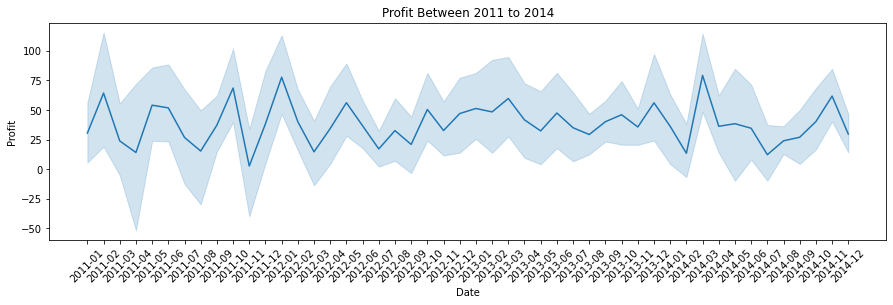

In [22]:
# Plotting the profit to check for consistency

df_new['Date'] = df_new['Date'].astype(str)
plt.figure(figsize = (15,4))
sns.lineplot(x = 'Date',y = 'Profit', data = df_new)
plt.title('Profit Between 2011 to 2014')
plt.xticks(rotation = 45)
plt.show()

**Profit is `consistent` as seen in the plot. It has `no high peaks or very low troughs`.**

In [23]:
# New dataframe df sales in a particular date are summed together to find the total sum of sales on that day.

df_new = df_new.groupby('Date')['Sales'].sum()
df_new = pd.DataFrame(df_new) 
df_new = df_new.reset_index()

# Converting the date into datetime format.

df_new['Date'] = pd.to_datetime(df_new['Date'] ) 
df_new = df_new.set_index('Date')

# Sorting the values by date for data so that test set lies after train set.

df_new = df_new.sort_values(by = 'Date', ascending = True) 

In [24]:
df_new.shape

(48, 1)

**There are `48 rows` for 48 months in the period between 2011 to 2014.**

### Plotting the sales for 48 Months :

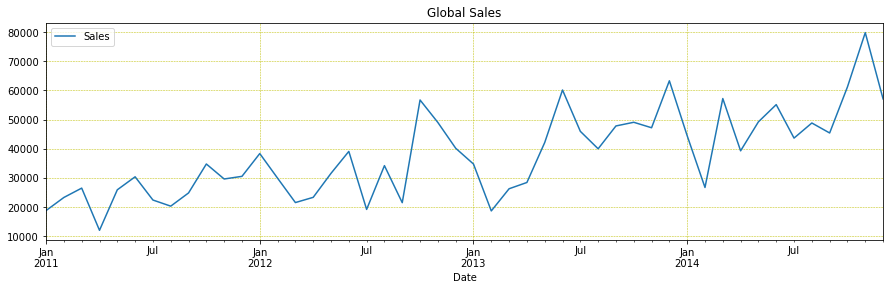

In [25]:
df_new.plot(figsize=(15, 4))
plt.legend(loc='best')
plt.grid(color='y', linestyle='--', linewidth=0.5)
plt.title('Global Sales')
plt.show()

**Observations from the plot:**
    
1. There are `no missing values`. 
2. There is an `overall upward trend` in the plot. 
3. There is `one major spike in between July and December every year`. 

### Decomposition of plot to check for Trend, Seasonality and Residuals 

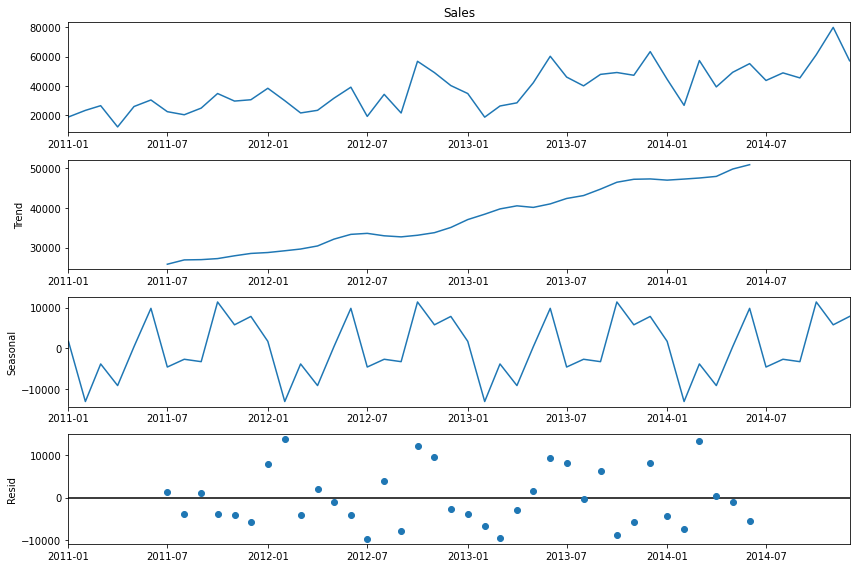

In [26]:
# Additive Decomposition

from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8

# Additive Seasonal Index

decomposition = sm.tsa.seasonal_decompose(df_new.Sales, model='additive') 
fig = decomposition.plot()
plt.show()

**The dataset has an `upward trend`, it has seasonality and also has some residual elements in addition to trend and seasonality.**

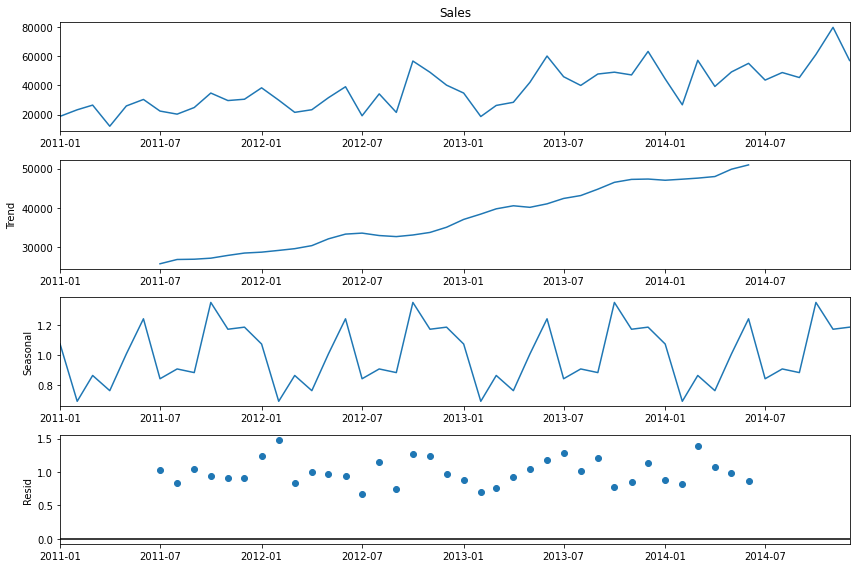

In [27]:
# Multiplicative Decomposition

decomposition = sm.tsa.seasonal_decompose(df_new.Sales, model='multiplicative') 
fig = decomposition.plot()
plt.show()

**The dataset has an `upward trend`, it has seasonality and also has some residual elements in addition to trend and seasonality.**

## Forecasting the Sales 

In [28]:
# We split the data again.

train_length = 42
trainset = df_new[0:train_length] # 42 months 
testset = df_new[train_length:] # 6 months

### Smoothing Techniques 

In [29]:
# Naive Forecast

y_hat_naive = testset.copy()
y_hat_naive['Naive forecast'] = trainset['Sales'][train_length-1] 

In [30]:
# Plotting the train, test and forecast.

def forecastplot(x, y):
    plt.figure(figsize = (15,4))
    plt.plot(trainset['Sales'], label = 'Train')
    plt.plot(testset['Sales'], label = 'Test')
    plt.plot(x, label = y )
    plt.title(y)
    plt.legend(loc='best')
    plt.xticks(rotation = 45)
    plt.show()

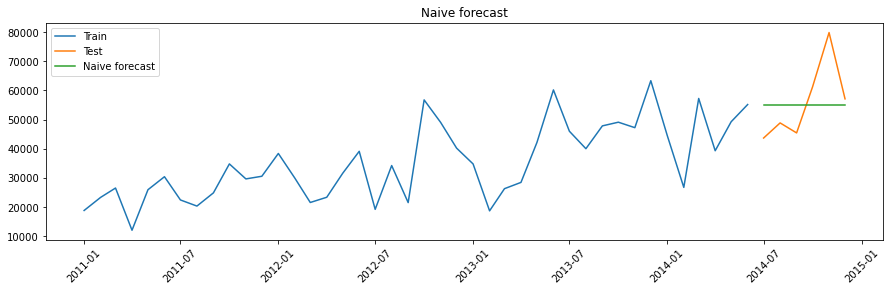

In [31]:
# Plot for Naive Forecast.

forecastplot(y_hat_naive['Naive forecast'], 'Naive forecast')

**The Naive method takes the last value as the forecasted value. As seen from plot, it `doesn't forecast the values accurately.`** 

In [32]:
# Calculating MAPE and RSME

from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_naive['Naive forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_naive['Naive forecast'])/testset['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


**`Lower the value of MAPE and RSME, better is the model.`**

In [33]:
# simple Average Forecast

y_hat_avg = testset.copy()
y_hat_avg['Average forecast'] = trainset['Sales'].mean()

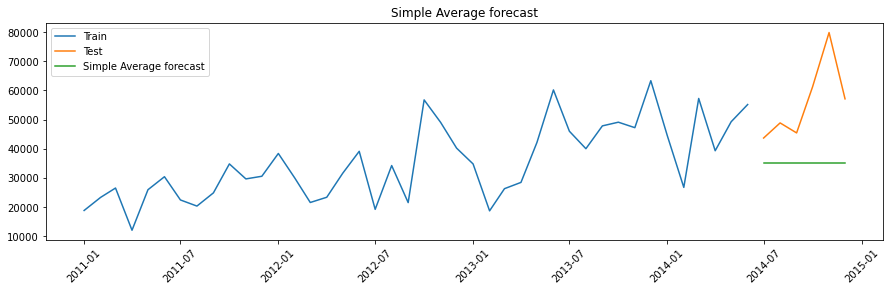

In [34]:
# Plotting Simple Average Forecast.

forecastplot(y_hat_avg['Average forecast'], 'Simple Average forecast')

**The Simple average method takes an average of the entire dataset and forecasts the average value as the future values. But in our case the `forecasted future value is not accurate for our plot`.**

In [35]:
# Calculating MAPE and RMSE

rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_avg['Average forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_avg['Average forecast'])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34


**We observe that the `MAPE value of Simple average method is almost twice that of Naive method` indicating that it performs poorer in comparison to Naive method.**

In [36]:
# Simple Moving average ( 6 Months )

y_hat_sma = df_new.copy()
ma_window6 = 6
y_hat_sma['sma_forecast6'] = df_new['Sales'].rolling(ma_window6).mean()
y_hat_sma['sma_forecast6'][train_length:] = y_hat_sma['sma_forecast6'][train_length-1]

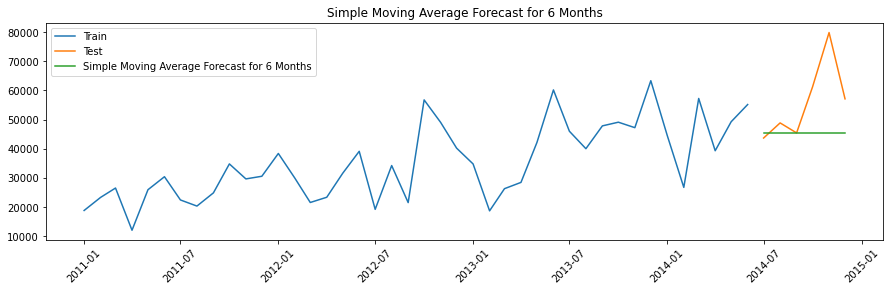

In [37]:
# Plotting Train, Test and Forecast values

forecastplot(y_hat_sma['sma_forecast6'][train_length:], 'Simple Moving Average Forecast for 6 Months')

**The window is reduced to 6 months to see the effect of shorter window. The level predicted is `poor than the 12 month` window.**

In [38]:
# MAPE and RMSE

rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_sma['sma_forecast6'][train_length:])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_sma['sma_forecast6'][train_length:])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Moving Average Forecast (6 Months)'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (6 Months),16294.34,16.80


**MAPE value of Simple moving average for window of 6 months is still low but it is slightly higher than the simple moving average model for 12 months window.**


In [39]:
# Simple Exponential smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(trainset['Sales'])
model_fit = model.fit(optimized=True) ## the most optimal alpha parameter will be chosen 
print(model_fit.params)
y_hat_ses = testset.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(len(testset))

{'smoothing_level': 0.22779248222840104, 'smoothing_slope': nan, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 22914.706051278183, 'initial_slope': nan, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


**The most optimal Alpha is chosen as `0.22`.**

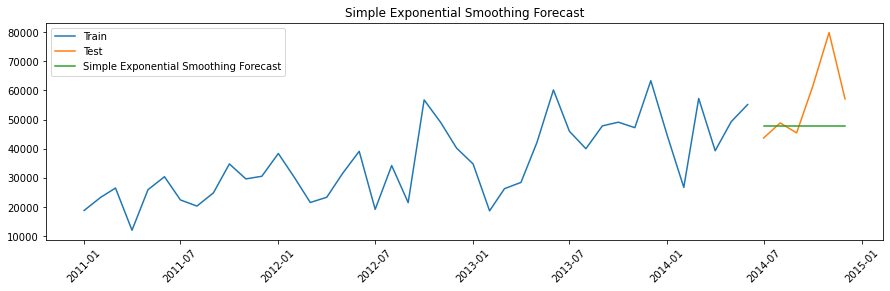

In [40]:
# Plotting Train, Test and Forecast values.

forecastplot(y_hat_ses['ses_forecast'], 'Simple Exponential Smoothing Forecast')

**The simple exponential method gives higher weight to the recent observation. Plot is better than Naive method and simple average method.**

In [41]:
# RMSE and MAPE

rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_ses['ses_forecast'])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Exponential method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Exponential method,14764.66,15.83


**`MAPE of Simple Exponential method is low`.**

In [42]:
# Holt's Exponential Smoothing Forecast 

from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(trainset['Sales']) ,seasonal_periods = 12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True) # most optimum alpha and beta values are taken
print(model_fit.params)
y_hat_holt = testset.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.00011457332972841143, 'smoothing_slope': 0.00011456959653301734, 'smoothing_seasonal': nan, 'damping_slope': nan, 'initial_level': 18311.05087727047, 'initial_slope': 819.857846927046, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


**Observtaions:**

- We'll take `Alpha and Beta as 0.008` . 
- `Initial level is taken as 14647` and `initial slope is 893`. 

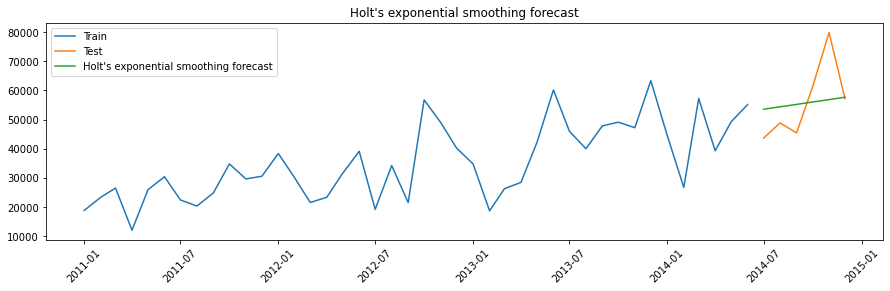

In [43]:
# Plotting Train, test and forecast values

forecastplot(y_hat_holt['holt_forecast'], 'Holt\'s exponential smoothing forecast')

**There is an `upward trend to the forecast values` now.**

In [44]:
# RMSE and MAPE 

rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_holt['holt_forecast'])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Exp method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Exponential method,14764.66,15.83
0,Holt Exp method,11402.24,15.63


In [45]:
# Holt Winter's Exponential Smoothing (Additive) Technique

y_hat_hwa = testset.copy()
model = ExponentialSmoothing(np.asarray(trainset['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hwa_forecast'] = model_fit.forecast(len(testset))

{'smoothing_level': 0.026947915865424013, 'smoothing_slope': 0.026947914467738976, 'smoothing_seasonal': 0.0, 'damping_slope': nan, 'initial_level': 30370.902628725915, 'initial_slope': 649.8325776031381, 'initial_seasons': array([ -9506.65873936, -19508.53724838, -12046.60418522, -19969.23736381,
        -9232.90515972,  -1016.67002323, -14185.4541823 , -12965.61452643,
       -13290.99275988,   1024.668988  ,  -4575.22686286,  -2683.50853795]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


**Observations:**

- We take `Alpha as 2.00, beta as 1.94 and gamma as 0`. 
- We observe that the `difference between subsequent troughs of the time series data does not increase` on progressing in the graph, hence Holt-Winters’ additive method works best.

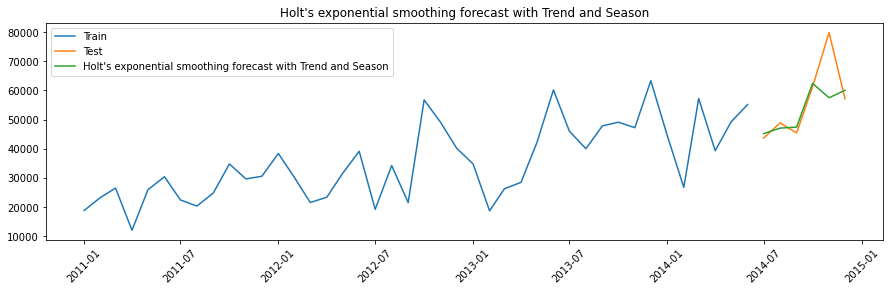

In [46]:
# Plotting Train, Test and Forecast values

forecastplot(y_hat_hwa['hwa_forecast'], 'Holt\'s exponential smoothing forecast with Trend and Season')

**As seen above ,the `plot has an upward trend and seasonality`.**

In [47]:
# RMSE and MAPE 

rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_hwa['hwa_forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_hwa['hwa_forecast'])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Exponential Additive method '], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Exponential method,14764.66,15.83
0,Holt Exp method,11402.24,15.63
0,Holt Exponential Additive method,9304.48,7.76


**`Holt exponential additive method has the lowest MAPE value` among all techniques.** 

In [48]:
# Holt's Exponential Smoothing (Multiplicative) Technique

y_hat_hwm = testset.copy()
model = ExponentialSmoothing(np.asarray(trainset['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hwm_forecast'] = model_fit.forecast(len(testset))

{'smoothing_level': 0.0001743699162834022, 'smoothing_slope': 0.00017436800205013333, 'smoothing_seasonal': 0.0005273030415577813, 'damping_slope': nan, 'initial_level': 34110.96532936017, 'initial_slope': 730.4169702967649, 'initial_seasons': array([0.71316265, 0.48521395, 0.68070858, 0.52962281, 0.7385419 ,
       0.901911  , 0.62145787, 0.6545268 , 0.64684965, 0.93184221,
       0.8270268 , 0.88324517]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


**We observe that the values of alpha, beta and gamma values are very low.**

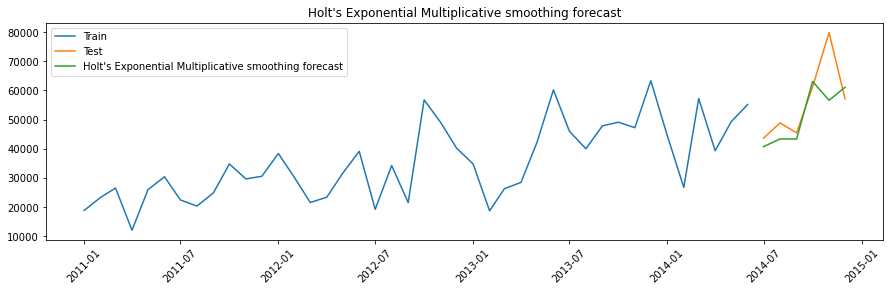

In [49]:
# Plotting Train, Test and Forecast values.

forecastplot(y_hat_hwm['hwm_forecast'], 'Holt\'s Exponential Multiplicative smoothing forecast')

**Plot shows that Holt Winters Multiplicative Method performs poorly as compared to the Holt Winter's additive method.**

In [50]:
# RMSE and MAPE 

rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_hwm['hwm_forecast'])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_hwm['hwm_forecast'])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Exponential method Multiplicative'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Exponential method,14764.66,15.83
0,Holt Exp method,11402.24,15.63
0,Holt Exponential Additive method,9304.48,7.76
0,Holt Exponential method Multiplicative,10021.79,10.30


**Observtaions:**

**- The `difference between subsequent troughs of the time series data does not increase` on progressing in the graph.**

**- MAPE of Holt winter's additive method is lower than that of Holt winter multiplicative method indicating that it is a better model.**

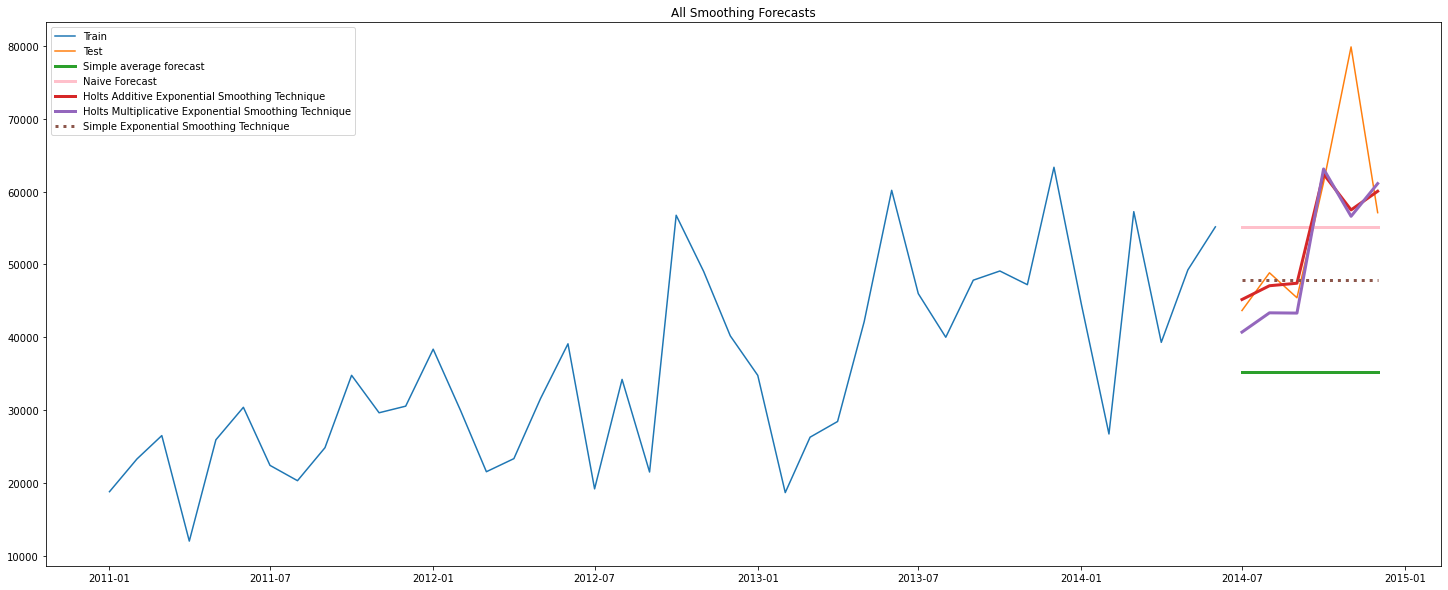

In [51]:
# Plotting all smoothing techniques together:

plt.figure(figsize=(25,10))
plt.plot(trainset['Sales'], label='Train')
plt.plot(testset['Sales'], label='Test')
plt.plot(y_hat_avg['Average forecast'], label='Simple average forecast',linewidth = 3)
plt.plot(y_hat_naive['Naive forecast'], label = 'Naive Forecast',linewidth = 3, color = 'pink')
plt.plot(y_hat_hwa['hwa_forecast'], label = 'Holts Additive Exponential Smoothing Technique',linewidth = 3)
plt.plot(y_hat_hwm['hwm_forecast'], label = 'Holts Multiplicative Exponential Smoothing Technique',linewidth = 3)
plt.plot(y_hat_ses['ses_forecast'], label = 'Simple Exponential Smoothing Technique',linewidth = 3,linestyle = 'dotted')
plt.legend(loc='best')
plt.title('All Smoothing Forecasts')
plt.show()

**Observations:**

- **Both Holt winters method display seasonilty and perform better than the other smoothing techniques. But the Holt Winters additive forecast is better than multiplicative forecast. It forecasts the level, trend and seasonlity fairly well compared to others.**

###  Auto Regression

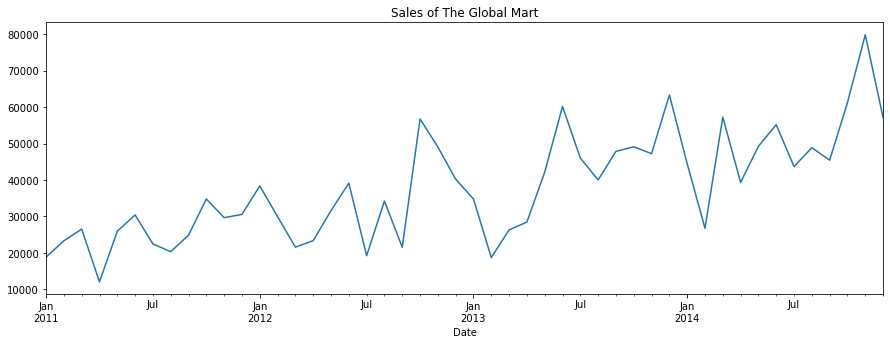

In [52]:
# Checking stationarity:

plt.figure(figsize = (15,5))
plt.title('Sales of The Global Mart')
df_new['Sales'].plot()

**Plot does not look like stationary. However, we will use ADF and KPSS tests to determine the stationarity of the series.**

In [53]:
# KPSS Test:

from statsmodels.tsa.stattools import kpss
kpss_test = kpss(df_new['Sales'])
print(kpss_test)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

(0.5770764651955994, 0.024720321345854595, 10, {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})
KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


**`p-value is 0.024` which is less than 0.05 indicating that the `null hypothesis can be rejected`. Series is not stationary.**

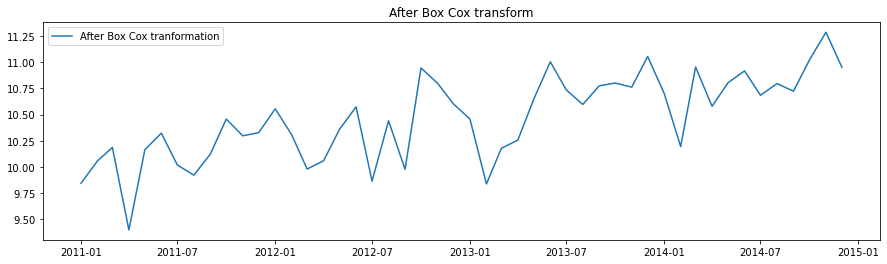

In [54]:
# Boxcox Transformation:

from scipy.stats import boxcox
df_boxcox = pd.Series(boxcox(df_new['Sales'], lmbda=0), index = df_new.index) ## creating a new series called df_boxcox

plt.figure(figsize=(15,4))
plt.plot(df_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform')
plt.show()

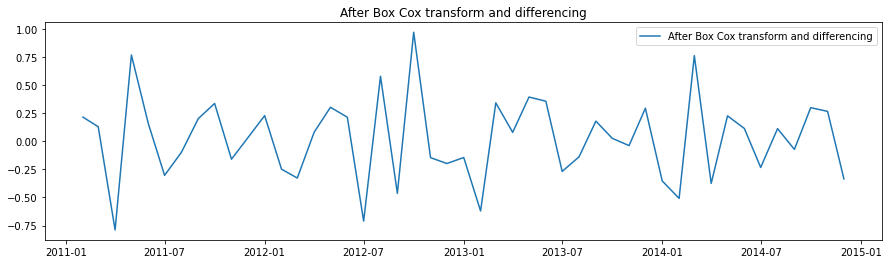

In [55]:
df_boxcox_diff = pd.Series(df_boxcox - df_boxcox.shift(), df_new.index)

df_boxcox_diff.dropna(inplace = True) 

plt.figure(figsize=(15,4))
plt.plot(df_boxcox_diff,label="After Box Cox transform and differencing")
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing')
plt.show()

**We have transformed and differentiated our series . Now we can perform stationarity tests.**

In [56]:
# splitting both data after bocox and data after boxcox and differencing:

train_data_boxcox = df_boxcox[:train_length]
test_data_boxcox = df_boxcox[train_length:]

train_data_boxcox_diff = df_boxcox_diff[:train_length-1]
test_data_boxcox_diff = df_boxcox_diff[train_length-1:]

In [57]:
# Auto-Regressive Method:

from statsmodels.tsa.arima_model import ARIMA  
model = ARIMA(train_data_boxcox_diff, order=(1, 0, 0))  


model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


**Model can be given as :**

**y_t = 0.024 - 0.406 ( y_t-1 ) + error**

In [58]:
# Recovering the original Series:

y_hat_ar = df_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max()) 

# entire data range
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum() 

## doing the opposite of differencing : cumulative sum
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(df_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox']) 

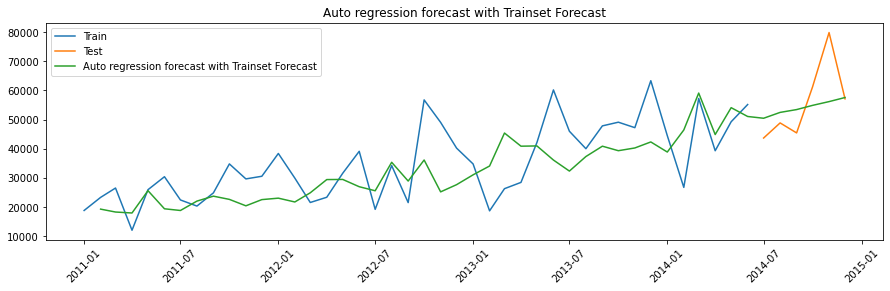

In [59]:
# Plotting the train, test and forecast values:

forecastplot(y_hat_ar['ar_forecast'],'Auto regression forecast with Trainset Forecast')

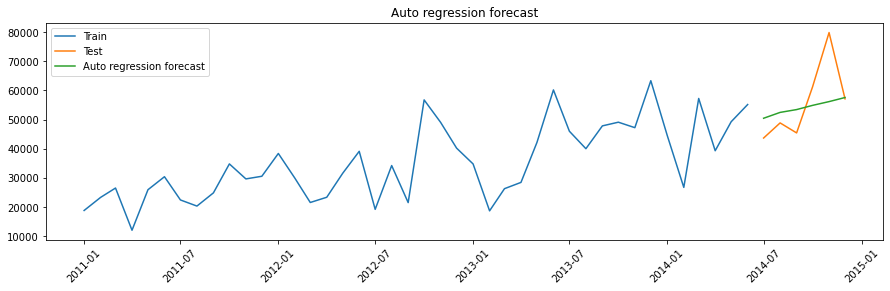

In [60]:
forecastplot(y_hat_ar['ar_forecast'][testset.index.min():],'Auto regression forecast')

**Plot 1 forecasts the trend better but it doesnt show seasonality.**

In [61]:
# MAPE and RMSE :

rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_ar['ar_forecast'][testset.index.min():])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_ar['ar_forecast'][testset.index.min():])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive (AR) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Exponential method,14764.66,15.83
0,Holt Exp method,11402.24,15.63
0,Holt Exponential Additive method,9304.48,7.76
0,Holt Exponential method Multiplicative,10021.79,10.30
0,Autoregressive (AR) method,10985.28,13.56


**`MAPE of AR method is higher than that of Holt's Exponential method` indicating that Holt's additive is a better model.**

In [62]:
# Moving Average:

model = ARIMA(train_data_boxcox_diff, order=(0, 0, 1)) ## q is 1
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


**ma.L1 is the MA coefficient for lag 1.**

In [63]:
# Recovering the original series:

y_hat_ma = df_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum() 
## taking the cumulative sum to reverse differencing 
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(df_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])
## reversing transformation
y_hat_ma.head()

Date
2011-02-01       0.214
2011-03-01    0.128816
2011-04-01   -0.789102
2011-05-01    0.767119
2011-06-01    0.158548
dtype: object

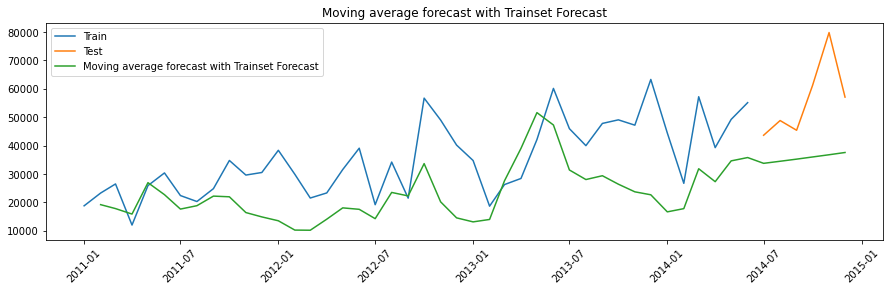

In [64]:
# Plotting Train, Test and Forecast Values:

forecastplot(y_hat_ma['ma_forecast'], 'Moving average forecast with Trainset Forecast')

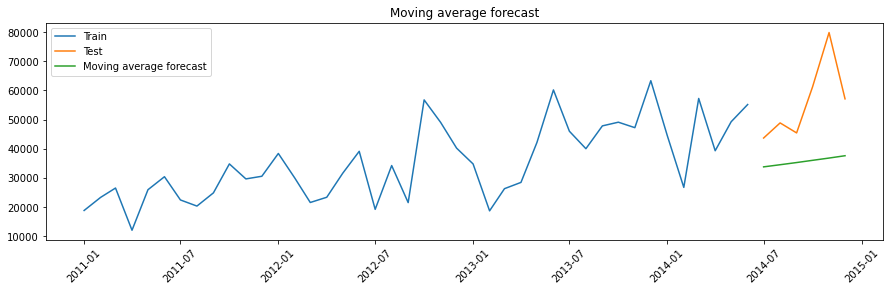

In [65]:
forecastplot(y_hat_ma['ma_forecast'][testset.index.min():], 'Moving average forecast')

**As seen from the above two plots, MA(1) underforecasts as compared to AR(1).**

In [66]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_ma['ma_forecast'][testset.index.min():])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_ma['ma_forecast'][testset.index.min():])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Moving Average (MA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Exponential method,14764.66,15.83
0,Holt Exp method,11402.24,15.63
0,Holt Exponential Additive method,9304.48,7.76
0,Holt Exponential method Multiplicative,10021.79,10.30
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93


**Moving average with a lag of 1 has a higher MAPE value than AR(1) indicating that it is a poorer model compared to AR(1).**

In [67]:
# ARMA (Auto-Regressive Moving Average method):

model = ARIMA(train_data_boxcox_diff, order=(1, 0, 1))
## p = 1 and q = 1
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


**AR(1) has a coefficent of 0.07 and MA(1) has a coefficient of -1.00 and the constant is 0.02.**

In [68]:
# Recover the original series:

y_hat_arma = df_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())

y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(df_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

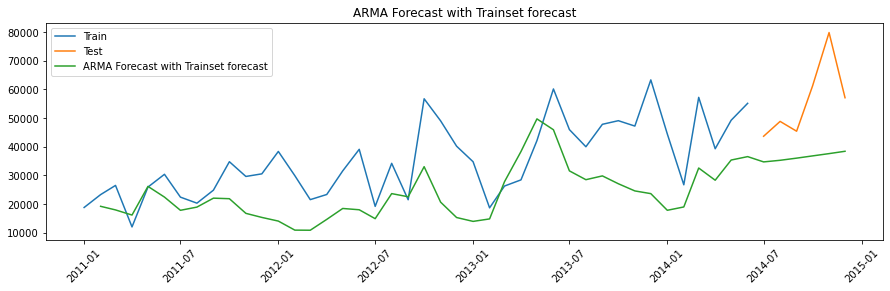

In [69]:
# Plotting the Train, Test and Forecasted values:

forecastplot(y_hat_arma['arma_forecast'], 'ARMA Forecast with Trainset forecast')

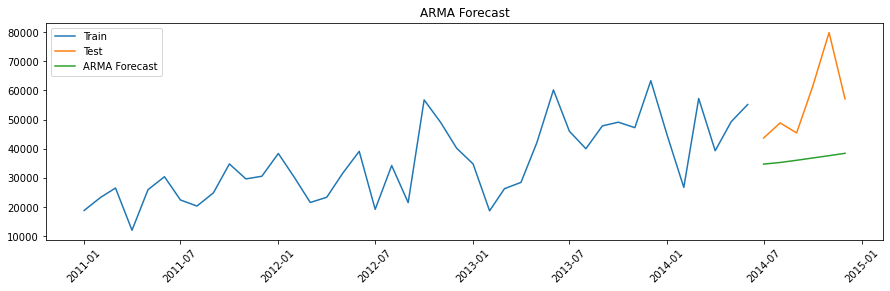

In [70]:
forecastplot(y_hat_arma['arma_forecast'][testset.index.min():], 'ARMA Forecast')

**As observed from the plots, `ARMA(1,1) also underforecasts`.**

In [71]:
rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_arma['arma_forecast'][train_length-1:])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_arma['arma_forecast'][train_length-1:])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive moving average (ARMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Exponential method,14764.66,15.83
0,Holt Exp method,11402.24,15.63
0,Holt Exponential Additive method,9304.48,7.76
0,Holt Exponential method Multiplicative,10021.79,10.30
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


**ARMA's performance is slightly better than MA(1) as the MAPE value is lower than that of MA(1).**

In [72]:
# ARIMA - Auto Regressive Integrated Moving Average:

model = ARIMA(train_data_boxcox, order=(1, 1, 1))

model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


**`Auto regressive coefficient is 0.07 and moving average coefficient is -1`.**

In [73]:
# Recover Original Series after Transformation

y_hat_arima = df_boxcox_diff.copy()

y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(df_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

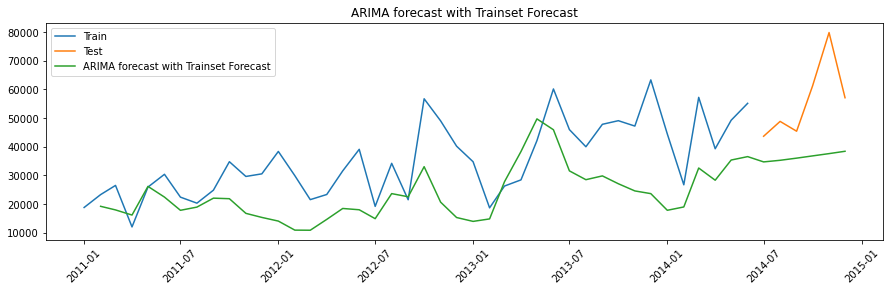

In [74]:
# Plotting Train, Test and Forecast values

forecastplot(y_hat_arima['arima_forecast'], 'ARIMA forecast with Trainset Forecast')

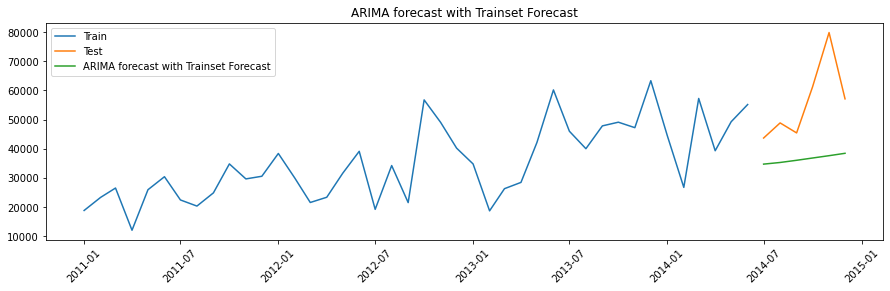

In [75]:
forecastplot(y_hat_arima['arima_forecast'][testset.index.min():], 'ARIMA forecast with Trainset Forecast')

**Both ARMA and ARIMA plots are the same as they both underforecast.**

In [76]:
# MAPE and RMSE :

rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_arima['arima_forecast'][testset.index.min():])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_arima['arima_forecast'][testset.index.min():])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Autoregressive integrated moving average (ARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple Average method,24146.06,34.34
0,Simple Moving Average Forecast (6 Months),16294.34,16.80
0,Simple Exponential method,14764.66,15.83
0,Holt Exp method,11402.24,15.63
0,Holt Exponential Additive method,9304.48,7.76
0,Holt Exponential method Multiplicative,10021.79,10.30
0,Autoregressive (AR) method,10985.28,13.56
0,Moving Average (MA) method,23360.02,33.93
0,Autoregressive moving average (ARMA) method,22654.32,32.40


**As observed, the MAPE values of ARMA and ARIMA with the same p and q values is the same.**

In [77]:
# SARIMA (Seasonal Auto Regressive Integrated Moving Average Method)

from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_data_boxcox, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)) 
## Non-seasonal elements p =1, q=1,d =1
## seasonal elements P = 1, Q= 1, D = 1, m= 12

## order is for non-seasonal parameters, seasonal orders are P,Q,D,m
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.042087
ma.L1      -0.996570
ar.S.L12    0.098631
ma.S.L12   -0.967648
sigma2      0.058484
dtype: float64


**Observations:**

- Non seasonal AR coefficient is -0.04
- Non seasonal MA coefficient is -0.99
- seasonal AR coefficient is 0.099
- seasonal MA coefficient is -0.96
- sigma2 is the intercept = 0.058

In [78]:
# Recovering the original series:

y_hat_sarima = df_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(df_boxcox_diff.index.min(), df_boxcox_diff.index.max())

y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

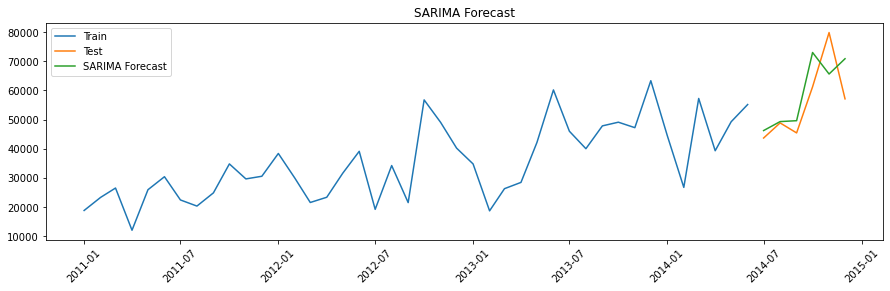

In [79]:
# Plotting Train, Test and Forecast values:

forecastplot(y_hat_sarima['sarima_forecast'][testset.index.min():], 'SARIMA Forecast')

**SARIMA performance is better than ARIMA. It forecasts level, trend and seasonality.**

In [80]:
# MAPE and RMSE:

rmse = np.sqrt(mean_squared_error(testset['Sales'], y_hat_sarima['sarima_forecast'][testset.index.min():])).round(2)
mape = np.round(np.mean(np.abs(testset['Sales']-y_hat_sarima['sarima_forecast'][testset.index.min():])/testset['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Seasonal autoregressive integrated moving average (SARIMA) method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results
results.set_index('Method')

,RMSE,MAPE
Method,,
Naive method,12355.97,17.47
Simple Average method,24146.06,34.34
Simple Moving Average Forecast (6 Months),16294.34,16.80
Simple Exponential method,14764.66,15.83
Holt Exp method,11402.24,15.63
Holt Exponential Additive method,9304.48,7.76
Holt Exponential method Multiplicative,10021.79,10.30
Autoregressive (AR) method,10985.28,13.56
Moving Average (MA) method,23360.02,33.93


**SARIMA is the best auto-regressive model with the lowest MAPE value of 12.88.**

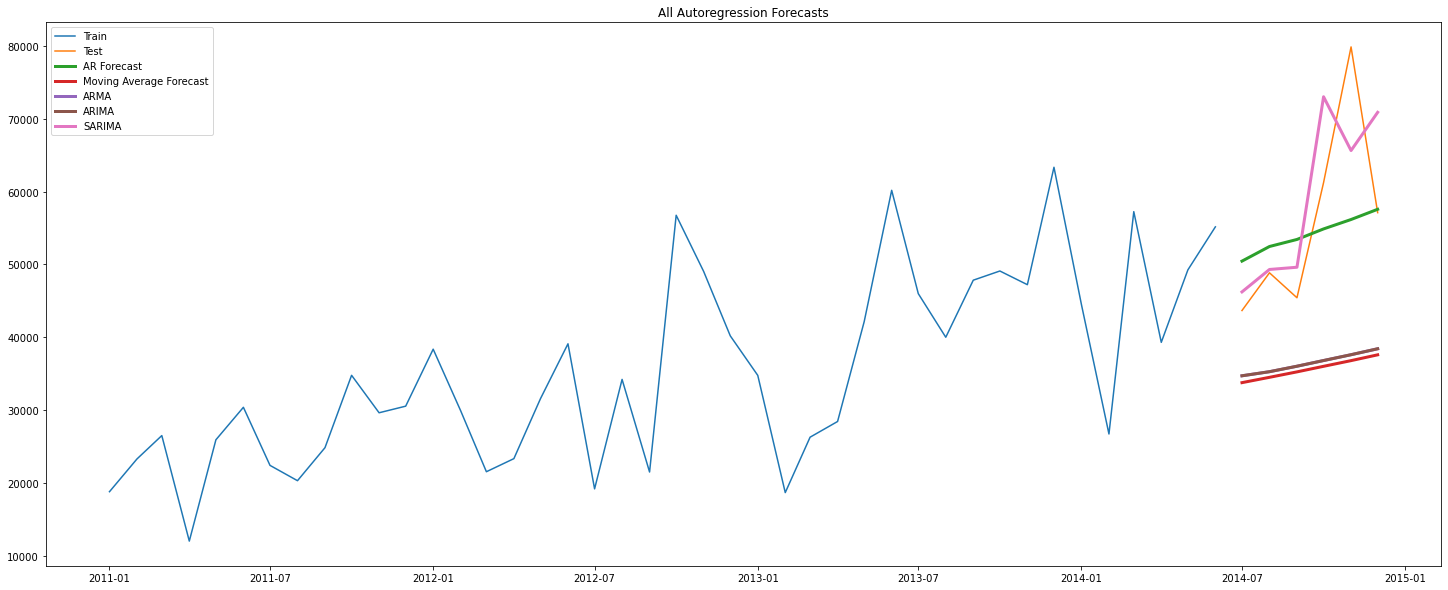

In [81]:
# Plotting all Autoregressive forecasts together:

plt.figure(figsize=(25,10))
plt.plot(trainset['Sales'], label='Train')
plt.plot(testset['Sales'], label='Test')

plt.plot(y_hat_ar['ar_forecast'][testset.index.min():], label = 'AR Forecast', linewidth = 3)
plt.plot(y_hat_ma['ma_forecast'][testset.index.min():], label = 'Moving Average Forecast',linewidth = 3)
plt.plot(y_hat_arma['arma_forecast'][testset.index.min():], label = 'ARMA',linewidth = 3)
plt.plot(y_hat_arima['arima_forecast'][testset.index.min():], label = 'ARIMA',linewidth = 3)
plt.plot(y_hat_sarima['sarima_forecast'][testset.index.min():], label = 'SARIMA',linewidth = 3)
plt.legend(loc='best')
plt.title('All Autoregression Forecasts')
plt.show()

**SARIMA forecasts are the closest to the test set and its performance is better than other Autoregressive techniques.**

**Conclusion:**
1. Sales data series had 48 observations. It displayed trend and seasonality. 
2. SARIMA performs the best in autoregression methods as it almost accurately predicts trend and seasonality. 
3. Holt Winters Additive method performs the best in smoothing techniques. 
4. APAC	and	EU consumer segments are the most profitable ones. Items corresponding to these segments should be kept	more in	stock.